# import libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#import dataset
df=pd.read_csv('dhaka homeprices.csv')
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


In [7]:
df.head()

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000


In [8]:
df.head(3)

,area,price
0,2600,55000
1,3000,56500
2,3200,61000


In [9]:
df.isnull().sum()

area     0
price    0
dtype: int64

In [10]:
df.isnull().any()

area     False
price    False
dtype: bool

Text(0.5, 1.0, 'Home price ')

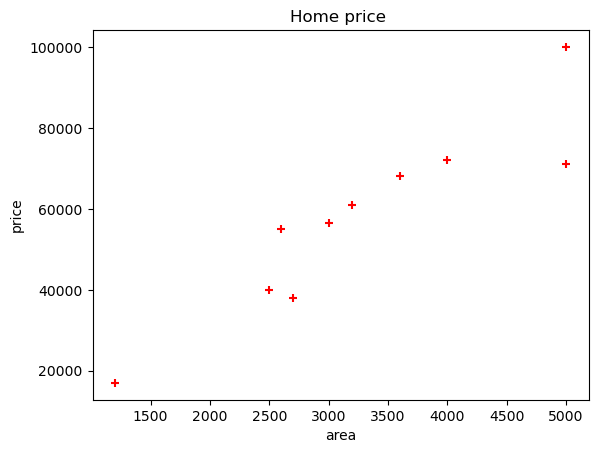

In [17]:
#plot

plt.scatter(df['area'],df['price'],marker='+',color='red')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Home price ')

In [18]:
#separate dependent and independent variable 
x=df[['area']]
y=df['price']

In [19]:
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,5000
6,2500
7,2700
8,1200
9,5000


In [20]:
y

0     55000
1     56500
2     61000
3     68000
4     72000
5     71000
6     40000
7     38000
8     17000
9    100000
Name: price, dtype: int64

In [23]:
df.shape

(10, 2)

In [29]:
#split dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [30]:
xtrain

,area
4,4000
0,2600
3,3600
1,3000
7,2700
8,1200
5,5000


In [31]:
xtest

,area
2,3200
9,5000
6,2500


In [32]:
ytest

2     61000
9    100000
6     40000
Name: price, dtype: int64

In [33]:
#fitting into linear regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [34]:
reg.predict(xtest)

array([54577.95521897, 81852.07441554, 43971.35330919])

In [36]:
reg.predict([[3500]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([59123.64175173])

In [39]:
reg.predict([[3900]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65184.55712875])

In [44]:
#find y=mx+c
m=reg.coef_

In [43]:
c=reg.intercept_

In [45]:
m*3900+c

array([65184.55712875])

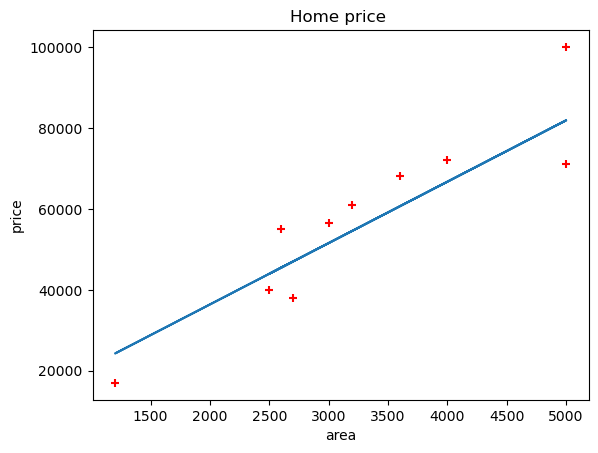

In [49]:
#draw a best fit line 
plt.scatter(df['area'],df['price'],marker='+',color='red')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Home price ')
plt.plot(df.area,reg.predict(df[['area']]))

In [52]:
#accuracy
reg.score(xtest,ytest)

0.7916065214158408

In [53]:
#import another test file
d=pd.read_csv('areas.csv')

In [54]:
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [55]:
reg.predict(d)

array([ 21242.92064537,  28819.06486664,  40940.89562068,  59729.73328943,
        68518.0605861 ,  75185.06750082,  89276.69575239,  58517.55021403,
        78064.00230491,  40940.89562068, 142461.22818571, 136400.31280869,
       113671.88014488])

In [57]:
#create a column at csv file
p=reg.predict(d)
d['price']=p

In [58]:
d

,area,price
0,1000,21242.920645
1,1500,28819.064867
2,2300,40940.895621
3,3540,59729.733289
4,4120,68518.060586
5,4560,75185.067501
6,5490,89276.695752
7,3460,58517.550214
8,4750,78064.002305
9,2300,40940.895621


In [59]:
d.to_csv('prediction home price.csv')

In [61]:
x=d[['area']]
y=d['price']

In [62]:
x

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [63]:
y

0      21242.920645
1      28819.064867
2      40940.895621
3      59729.733289
4      68518.060586
5      75185.067501
6      89276.695752
7      58517.550214
8      78064.002305
9      40940.895621
10    142461.228186
11    136400.312809
12    113671.880145
Name: price, dtype: float64

In [64]:
reg.score(x,y)

1.0